# Задача 1.3.

---

Проанализировать консервативность z-критерия для корреляции Пирсона в зависимости от:

- Мощности выборки
- Проверяемого значения коэффициента корреляции

Напоминание (об этом говорилось на лекции): Z-тест позволяет проверять не только соответствие корреляции нулю, но и производить сопоставление с произвольным значением корреляции.

---

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from functools import reduce
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt

%matplotlib inline

Я буду семплировать данные из стандартного нормального распределения: $sample_1\sim N(0,1)$, $sample_2\sim (1+\sigma)\cdot N(0,1)$. Тогда корреляция Пирсона - это: 
$$corr=\frac{1}{\sqrt{1+\sigma^2}}.$$

## 1. Зависимость от мощности выборки:

Напишем вспомогательные функции для проведения экспериментов:

In [20]:
# семплирует выборки
def sampler(sample_size, sigma):
    sample = np.random.randn(sample_size)
    return sample, sample + sigma * sample

# фишеровское преобразование
def fischer(r, corr, length):
    z = np.arctanh(r) - np.arctanh(corr)
    z /= np.sqrt(length - 3)
    return 2 * (1 - ss.norm.cdf(np.abs(z)))

# для проведения гранулярного теста
def test(sample_size, sigma, sign_level, corr):
    sample_1, sample_2 = sampler(sample_size, sigma)
    r = ss.pearsonr(sample_1, sample_2)[0]
    return int(fischer(r, corr, sample_size) <= sign_level)

# для проведения серии тестов
def tests(experiment_count, sample_size, sigma, sign_level = 0.05):
    corr = 1 / np.sqrt(1 + sigma ** 2)
    z_result = reduce(lambda a, x: a + test(sample_size, sigma, sign_level, corr), range(experiment_count))
    return z_result / experiment_count

Зададим гиперпараметры для экспериментов:

In [21]:
sample_size = 1000
sigma = 1
experiment_count_list = np.linspace(100, 10000, 100, dtype=int)

Проведем серию экспериметов, меняя мощность:

In [22]:
result_list = []
for experiment_count in tqdm(experiment_count_list):
    result_list.append(tests(experiment_count, sample_size, sigma))

  0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/d3/f6j6w0f95ql3mz3ss5svbf200000gn/T/ipykernel_30932/1370895108.py:8: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(r) - np.arctanh(corr)


Построим график зависимости:

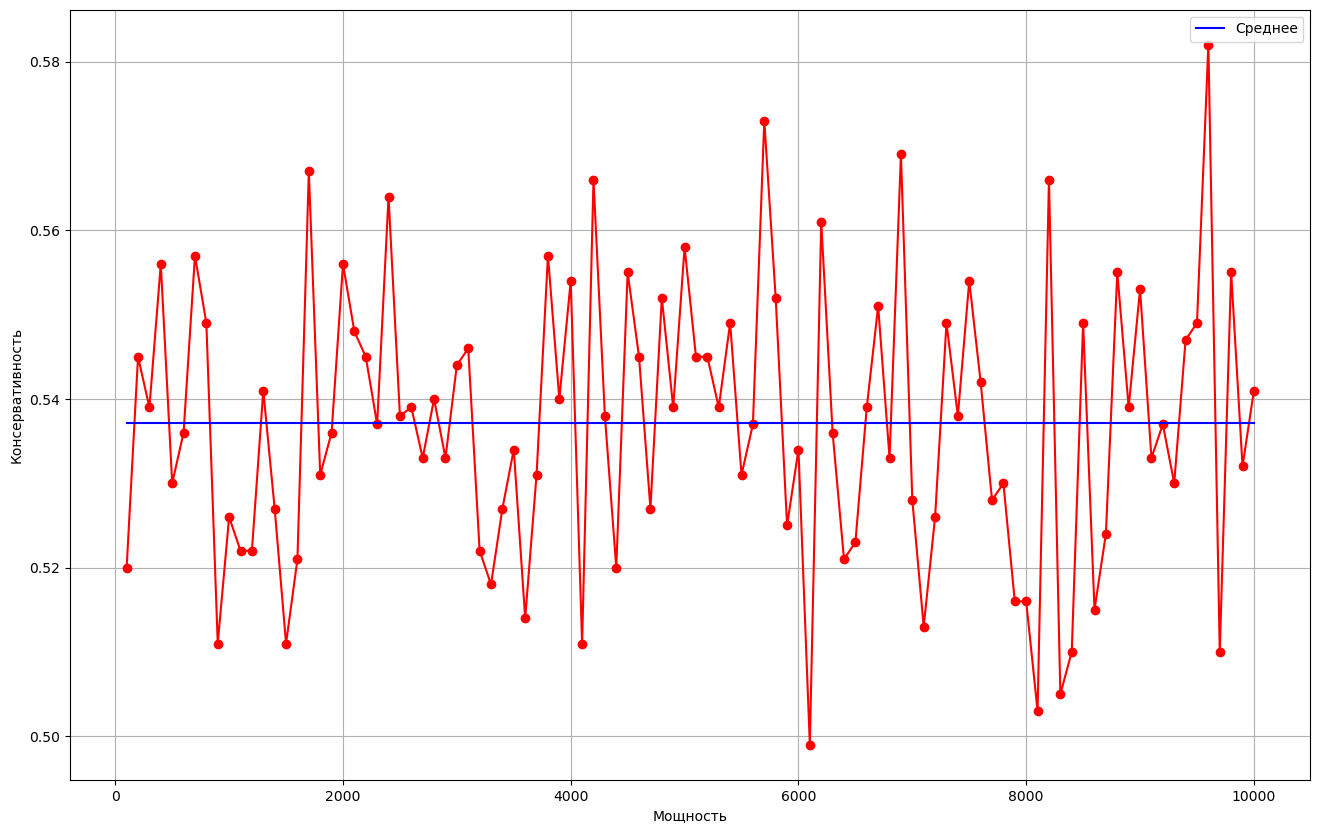

In [32]:
plt.figure(figsize = (16, 10))
plt.plot(experiment_count_list, result_list, 'ro-')
plt.plot((experiment_count_list[0], experiment_count_list[-1]), (np.mean(result_list), np.mean(result_list)), 'b-', label='Среднее')
plt.xlabel('Мощность')
plt.ylabel('Консервативность')
plt.legend()
plt.grid()

None

**Вывод**: из графика видно, что консервативность не зависит от мощности.

## 2. Зависимость консервативности от проверяемого значения коэффициента корреляции:

Зададим гиперпараметры для экспериментов:

In [29]:
sample_size = 1000
sigma_list = list(np.logspace(0.001, 1, 100)-1)
experiment_count = 1000

Проведем серию экспериметов, меняя корреляцию:

In [31]:
result_list = []
corr_list = list(map(lambda sigma: 1 / np.sqrt(1 + sigma ** 2), sigma_list))

for sigma in tqdm(sigma_list):
    result_list.append(tests(experiment_count, sample_size, sigma))

  0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/d3/f6j6w0f95ql3mz3ss5svbf200000gn/T/ipykernel_30932/1370895108.py:8: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(r) - np.arctanh(corr)


Построим график зависимости:

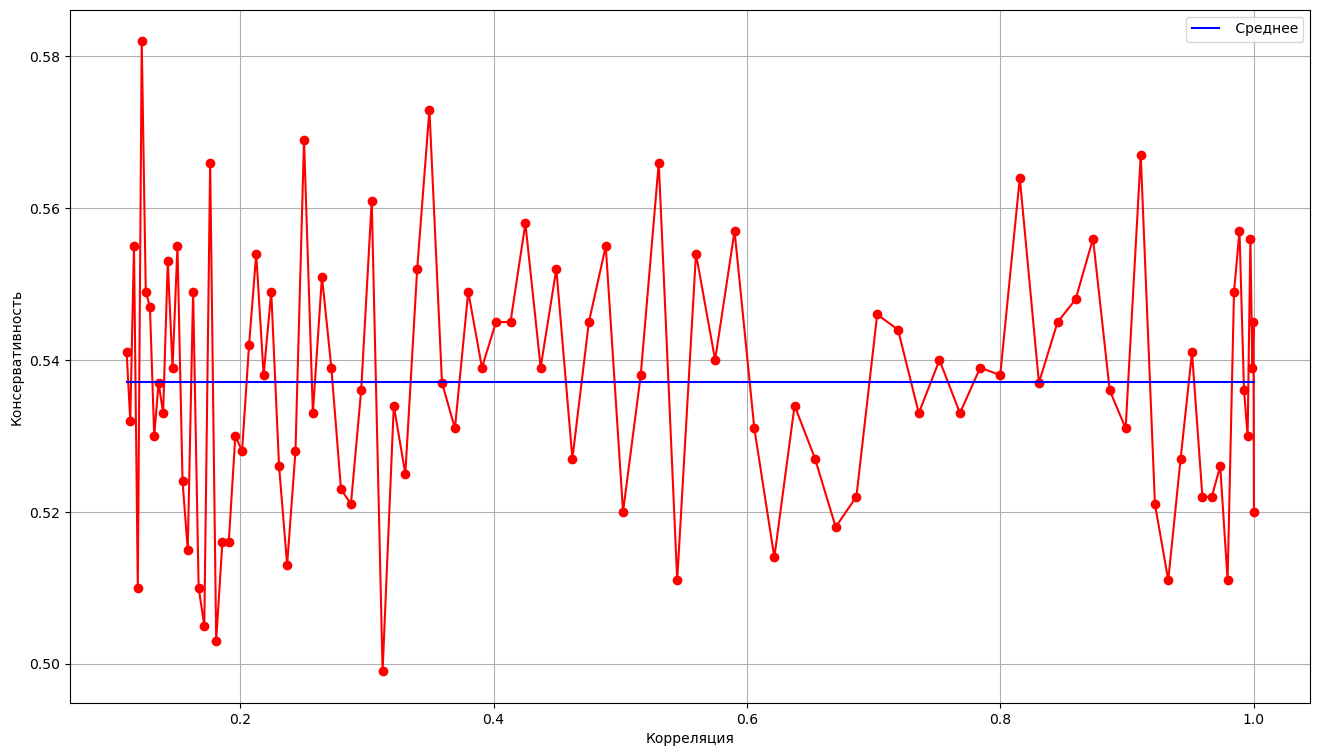

In [35]:
plt.figure(figsize = (16, 9))
plt.plot(corr_list, result_list, 'ro-')
plt.plot((corr_list[0], corr_list[-1]), (np.mean(result_list), np.mean(result_list)), 'b-', label=' Среднее')
plt.xlabel('Корреляция')
plt.ylabel('Консервативность')
plt.legend()
plt.grid()

**Вывод**: опять же не наблюдается никакой зависимости, что вполне закономерно.